# 💻 Question No: 01

## ⚙️ Setup

- Ensure the Python kernel has the necessary libraries: `pandas`, `seaborn`,`numpy`,`kmeans`,`matplotlib` and `lets-plot`
- Ensure the `Marketing-Customer-Value-Analysis..csv` file is in the `data` folder.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [57]:
# Load the dataset
df = pd.read_csv("D:/Data Science for Marketing-I/dataset/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

### i. Perform basic exploratory data analysis (EDA) such as checking dataset shape and previewing the first few rows. What insights can be drawn from this initial exploration?

In [58]:
df.shape

(9134, 24)

💡The dataset contains 9,134 records and 24 columns.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i


💡There are various categorical and numerical variables related to customers and their insurance policies.


### ii. Analyze customer engagement by grouping data based on the Response variable. How does this grouping help in understanding customer behavior?

In [60]:
df['Response'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [61]:

response_counts = df['Response'].value_counts()
response_counts

Response
0    7826
1    1308
Name: count, dtype: int64

In [62]:
response_percentage = df['Response'].value_counts(normalize=True) * 100
response_percentage

Response
0    85.679877
1    14.320123
Name: proportion, dtype: float64

💡    
85.68% of customers did not respond, while 14.32% engaged.
This suggests that the majority of customers are not engaging with marketing efforts.

### iii. Visualize the engagement rate using a bar chart. What is the significance of this visualization, and how does the code achieve it?

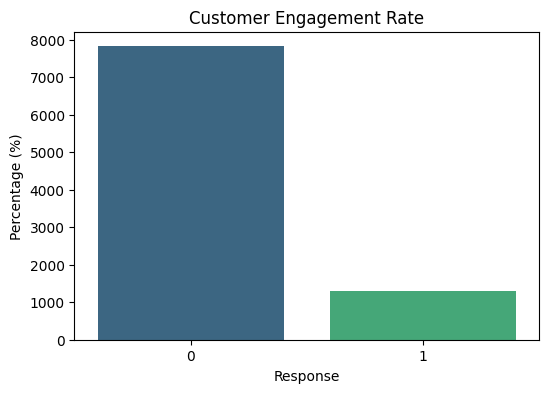

In [65]:
plt.figure(figsize=(6, 4))
sns.barplot(x=response_counts.index, y=response_counts.values, hue=response_counts.index, palette="viridis", legend=False)
plt.xlabel("Response")
plt.ylabel("Percentage (%)")
plt.title("Customer Engagement Rate")
plt.show()


💡A bar chart shows a significantly higher percentage of customers who did not respond.This visualization highlights the challenge of low engagement.

### iv. Calculate the engagement rate for different renewal offer types and interpret the results. Why is this metric useful?


In [ ]:
renew_offer_engagement = df.groupby("Renew Offer Type")["Response"].value_counts(normalize=True).unstack() * 100
renew_offer_engagement

Response,0,1
Renew Offer Type,,
Offer1,84.168443,15.831557
Offer2,76.623377,23.376623
Offer3,97.905028,2.094972
Offer4,100.000000,NaN


💡Offer2 has the highest engagement rate (23.38%), while Offer3 and Offer4 show very low engagement.

        Offer4 has 0% engagement, indicating it might not be attractive to customers.

### v. Extend the analysis by exploring engagement rates segmented by both Renew Offer Type and Vehicle Class. How does this multi-level grouping provide deeper insights?

In [ ]:
multi_group = df.groupby(["Renew Offer Type", "Vehicle Class"])["Response"].value_counts(normalize=True).unstack() * 100
print("\nEngagement Rate by Renew Offer Type & Vehicle Class:\n", multi_group)


Engagement Rate by Renew Offer Type & Vehicle Class:
 Response                                 0          1
Renew Offer Type Vehicle Class                       
Offer1           Four-Door Car   85.308848  14.691152
                 Luxury Car      91.176471   8.823529
                 Luxury SUV      79.775281  20.224719
                 SUV             81.165919  18.834081
                 Sports Car      81.497797  18.502203
                 Two-Door Car    85.861561  14.138439
Offer2           Four-Door Car   78.082192  21.917808
                 Luxury Car      85.365854  14.634146
                 Luxury SUV      74.468085  25.531915
                 SUV             75.000000  25.000000
                 Sports Car      68.831169  31.168831
                 Two-Door Car    75.856930  24.143070
Offer3           Four-Door Car   96.778523   3.221477
                 Luxury Car     100.000000        NaN
                 Luxury SUV     100.000000        NaN
                 SUV       

💡    Luxury SUVs and Sports Cars in Offer2 have higher engagement compared to other categories.Offer3 and Offer4 consistently have very low engagement rates across all vehicle classes.

### vi. Perform customer segmentation using the variables ‘Customer Lifetime Value (CLV)’ and ‘Months Since Policy Inception’


In [ ]:
X = df[["Customer Lifetime Value", "Months Since Policy Inception"]]

# Standardizing the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means clustering with 3 clusters (can be adjusted)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

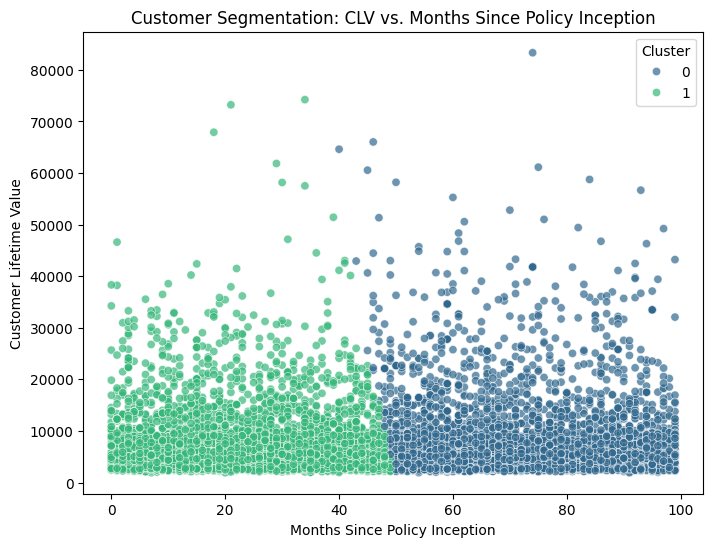

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Months Since Policy Inception", y="Customer Lifetime Value", hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Months Since Policy Inception")
plt.ylabel("Customer Lifetime Value")
plt.title("Customer Segmentation: CLV vs. Months Since Policy Inception")
plt.legend(title="Cluster")
plt.show()

### vii. Create a visualization to compare CLV against Months Since Policy Inception


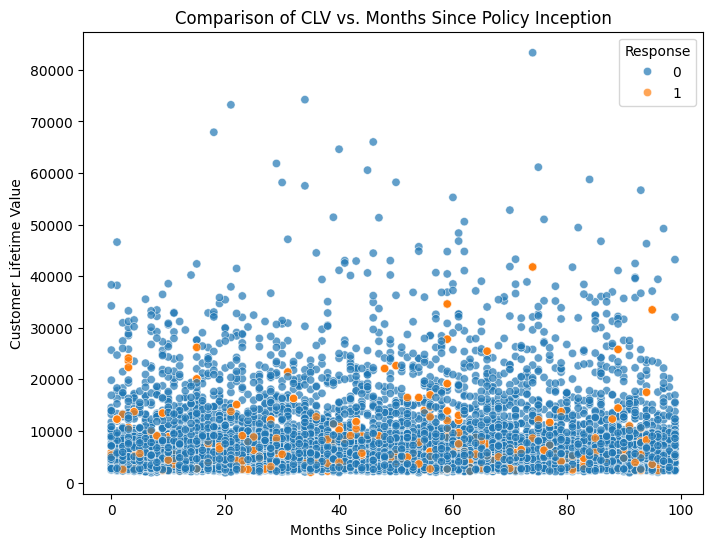

In [ ]:
# Visualization: CLV vs. Months Since Policy Inception
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Months Since Policy Inception", y="Customer Lifetime Value", hue="Response", alpha=0.7)
plt.xlabel("Months Since Policy Inception")
plt.ylabel("Customer Lifetime Value")
plt.title("Comparison of CLV vs. Months Since Policy Inception")
plt.legend(title="Response")
plt.show()


💡   The scatter plot suggests no clear pattern, but higher CLV customers might be more engaged.Some high CLV customers have been with the company for a long time,There is no strong linear trend, suggesting CLV is not strictly dependent on policy duration.